(sentinel-2)=
# Sentinel-2 L2A

## Product description

The Sentinel-2 L2A data product available in the SALDi Data Cube (SDC) is a 
mirror of [Digital Earth Africa](https://www.digitalearthafrica.org/)'s product 
of the same name. 

Detailed information can be found [here](https://docs.digitalearthafrica.org/en/latest/data_specs/Sentinel-2_Level-2A_specs.html) and [here](https://registry.opendata.aws/deafrica-sentinel-2/).

The product abbreviation used in this package is `s2_l2a`

## Import packages

Let's first import all packages that we need in this notebook. The `%matplotlib inline` is a ["magic" function](https://ipython.readthedocs.io/en/stable/interactive/tutorial.html#magics-explained) useful in Jupyter notebooks, which enables the rendering of Matplotlib plots directly below code cells.

In [ ]:
%matplotlib inline
from matplotlib import pyplot as plt
from sdc.load import load_product
from sdc.utils import groupby_acq_slices

## Loading data

In [2]:
ds = load_product(product="s2_l2a",
                  vec="site06", 
                  time_range=("2021-01-01", "2022-01-01"))
ds

[WARNING] Loading data for an entire SALDi site will likely result in performance issues as it will load data from multiple tiles. Only do so if you know what you are doing and have optimized your workflow! It is recommended to start with a small subset to test your workflow before scaling up.


<xarray.Dataset> Size: 689GB
Dimensions:      (time: 438, latitude: 5500, longitude: 6500)
Coordinates:
  * latitude     (latitude) float64 44kB -24.9 -24.9 -24.9 ... -26.0 -26.0 -26.0
  * longitude    (longitude) float64 52kB 30.75 30.75 30.75 ... 32.05 32.05
    spatial_ref  int32 4B 4326
  * time         (time) datetime64[ns] 4kB 2021-01-01T08:17:00 ... 2021-12-29...
Data variables:
    B02          (time, latitude, longitude) float32 63GB dask.array<chunksize=(438, 360, 425), meta=np.ndarray>
    B03          (time, latitude, longitude) float32 63GB dask.array<chunksize=(438, 360, 425), meta=np.ndarray>
    B04          (time, latitude, longitude) float32 63GB dask.array<chunksize=(438, 360, 425), meta=np.ndarray>
    B05          (time, latitude, longitude) float32 63GB dask.array<chunksize=(438, 360, 425), meta=np.ndarray>
    B06          (time, latitude, longitude) float32 63GB dask.array<chunksize=(438, 360, 425), meta=np.ndarray>
    B07          (time, latitude, longitude) float32 63GB dask.array<chunksize=(438, 360, 425), meta=np.ndarray>
    B08          (time, latitude, longitude) float32 63GB dask.array<chunksize=(438, 360, 425), meta=np.ndarray>
    B8A          (time, latitude, longitude) float32 63GB dask.array<chunksize=(438, 360, 425), meta=np.ndarray>
    B09          (time, latitude, longitude) float32 63GB dask.array<chunksize=(438, 360, 425), meta=np.ndarray>
    B11          (time, latitude, longitude) float32 63GB dask.array<chunksize=(438, 360, 425), meta=np.ndarray>
    B12          (time, latitude, longitude) float32 63GB dask.array<chunksize=(438, 360, 425), meta=np.ndarray>

We have now _lazily_ loaded Sentinel-2 L2A data, meaning that the underlying 
data is not yet loaded into memory (please refer to {ref}`xarray-dask-intro` for a short 
introduction on this topic). What is available, however, is an interactive representation 
of the `xarray.Dataset` object, which can be explored to get a better understanding of 
the data. You can click on different elements to expand them and see their content.

The dimensions of the `xarray.Dataset` are `latitude`, `longitude` and `time`. 
The values are by default available in memory and the underlying data can be 
inspected directly, e.g. by indexing the first 10 elements: 

In [3]:
ds.time[0:10]

<xarray.DataArray 'time' (time: 10)> Size: 80B
array(['2021-01-01T08:17:00.000000000', '2021-01-01T08:17:14.000000000',
       '2021-01-03T08:07:00.000000000', '2021-01-03T08:07:03.000000000',
       '2021-01-03T08:07:14.000000000', '2021-01-03T08:07:17.000000000',
       '2021-01-06T08:16:58.000000000', '2021-01-06T08:17:13.000000000',
       '2021-01-08T08:07:02.000000000', '2021-01-08T08:07:05.000000000'],
      dtype='datetime64[ns]')
Coordinates:
    spatial_ref  int32 4B 4326
  * time         (time) datetime64[ns] 80B 2021-01-01T08:17:00 ... 2021-01-08...

Having a closer look at one of the bands (`Data variable` in Xarray 
terminology), we get an overview of the data structure without actually loading any of 
the almost 60 GB into memory. This representation is showing us how the data is
"chunked" (i.e. how it is divided into smaller parts for parallel processing).

The example below shows the `B08`-band (Near Infrared 1 / NIR), which is available as 
an `xarray.DataArray` object. By default, `sdc-tools` has applied the chunking spatially 
while keeping the time dimension as a single chunk. This is a common strategy for 
time series analysis. Visualizing individual time slices, as we will do in the following 
sections of this notebook, is still possible but not very efficient.

In [4]:
ds.B08

<xarray.DataArray 'B08' (time: 438, latitude: 5500, longitude: 6500)> Size: 63GB
dask.array<rechunk-p2p, shape=(438, 5500, 6500), dtype=float32, chunksize=(438, 360, 425), chunktype=numpy.ndarray>
Coordinates:
  * latitude     (latitude) float64 44kB -24.9 -24.9 -24.9 ... -26.0 -26.0 -26.0
  * longitude    (longitude) float64 52kB 30.75 30.75 30.75 ... 32.05 32.05
    spatial_ref  int32 4B 4326
  * time         (time) datetime64[ns] 4kB 2021-01-01T08:17:00 ... 2021-12-29...
Attributes:
    nodata:   0

Sometimes it makes sense to assign data to new Python variables, e.g. to make 
the code more readable. Let's assign the `B08` band to a new variable called `nir1`. As you can see, the data structure is still the same.

In [5]:
nir1 = ds.B08
nir1

<xarray.DataArray 'B08' (time: 438, latitude: 5500, longitude: 6500)> Size: 63GB
dask.array<rechunk-p2p, shape=(438, 5500, 6500), dtype=float32, chunksize=(438, 360, 425), chunktype=numpy.ndarray>
Coordinates:
  * latitude     (latitude) float64 44kB -24.9 -24.9 -24.9 ... -26.0 -26.0 -26.0
  * longitude    (longitude) float64 52kB 30.75 30.75 30.75 ... 32.05 32.05
    spatial_ref  int32 4B 4326
  * time         (time) datetime64[ns] 4kB 2021-01-01T08:17:00 ... 2021-12-29...
Attributes:
    nodata:   0

(xarray-shorts-1)=
## Xarray Shorts: Indexing and basic plotting

```{note}
Sections with the "Xarray Shorts"-prefix are meant to be practical introductions to various Xarray features. They are not product-specific and can (and should) be applied to other products and data as well.
```

The [indexing and selecting](https://docs.xarray.dev/en/stable/user-guide/indexing.html#) capabilities of Xarray allow for a lot of flexibility in how to access the data. 

In the following example we select a single time step using the `.sel`-method. 
Passing a date string and the `method='nearest'` argument, the nearest time step 
is selected. Looking at the data structure, we can see that it is now a 
2-dimensional `xarray.DataArray` object and that the `time`-dimension has been 
dropped.

In [6]:
nir1_scene = nir1.sel(time="2021-06-26", method="nearest")
nir1_scene

<xarray.DataArray 'B08' (latitude: 5500, longitude: 6500)> Size: 143MB
dask.array<getitem, shape=(5500, 6500), dtype=float32, chunksize=(360, 425), chunktype=numpy.ndarray>
Coordinates:
  * latitude     (latitude) float64 44kB -24.9 -24.9 -24.9 ... -26.0 -26.0 -26.0
  * longitude    (longitude) float64 52kB 30.75 30.75 30.75 ... 32.05 32.05
    spatial_ref  int32 4B 4326
    time         datetime64[ns] 8B 2021-06-25T08:17:15
Attributes:
    nodata:   0

We can index in the same way along the `latitude` and `longitude` dimensions 
to select a single pixel. The result is a 1-dimensional `xarray.DataArray` 
object with only the `time`-dimension left.

In [7]:
px_water = (31.571, -24.981)
px_veg1 = (31.5384, -25.0226)
px_veg2 = (31.551, -25.034)

nir1_px_water = nir1.sel(longitude=px_water[0], latitude=px_water[1], method="nearest")
nir1_px_veg1 = nir1.sel(longitude=px_veg1[0], latitude=px_veg1[1], method="nearest")
nir1_px_veg2 = nir1.sel(longitude=px_veg2[0], latitude=px_veg2[1], method="nearest")

nir1_px_veg1

<xarray.DataArray 'B08' (time: 438)> Size: 2kB
dask.array<getitem, shape=(438,), dtype=float32, chunksize=(438,), chunktype=numpy.ndarray>
Coordinates:
    latitude     float64 8B -25.02
    longitude    float64 8B 31.54
    spatial_ref  int32 4B 4326
  * time         (time) datetime64[ns] 4kB 2021-01-01T08:17:00 ... 2021-12-29...
Attributes:
    nodata:   0

Let's visualize the time series of the selected pixels. We can use the 
`.plot`-methods of the `xarray.DataArray` object to create different plots using 
the [Matplotlib](https://matplotlib.org/) backend. An overview of different 
types can be found [here](https://docs.xarray.dev/en/stable/api/plotting.html),
where you can also find more information on which arguments can be passed. 

We use the `.plot.scatter`-method to create a scatter plot of the time series. 
Even though Matplotlib is already used in the background by Xarray, we can also load it 
here directly in order to further customize the plot.

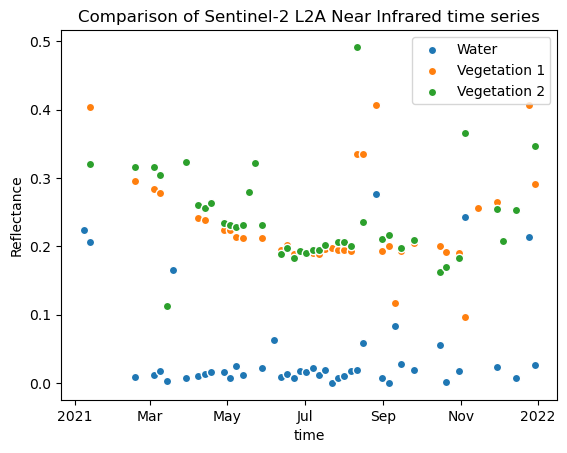

In [8]:
nir1_px_water.plot.scatter(x="time", label="Water")
nir1_px_veg1.plot.scatter(x="time", label="Vegetation 1")
nir1_px_veg2.plot.scatter(x="time", label="Vegetation 2")
plt.title("Comparison of Sentinel-2 L2A Near Infrared time series")
plt.ylabel("Reflectance")
plt.legend()

```{tip}
A lot of beginners start visualizing their data using the `.plot`-method, which is an 
obvious choice. However, this can often times lead to confusing or misleading time 
series plots. See [here](https://github.com/Jena-Earth-Observation-School/sdc-tools/issues/44)
for what I mean exactly. Better start with a simple scatter plot and then move on to
more complex plots, e.g. line plots in combination with [interpolation methods](https://docs.xarray.dev/en/stable/user-guide/interpolation.html).
```

Have you noticed that all cells up to this point were executed almost 
instantly, whereas this one took some time to finish?

Until now we have just looked at the lazily loaded representations of the data. In order to create the plot, however, the `.plot`-method has to load the underlying data into memory, do whatever calculations are necessary and then create the plot. This is why it took longer to execute.

(xarray-shorts-2)=
## Xarray Shorts: Spatial subset

In {ref}`xarray-shorts-1` we have indexed our data by time and also selected a 
point coordinate. Using the `.sel`-method we can also select a spatial subset by 
slicing the `latitude` and `longitude` dimensions. This is also described 
[here](https://docs.xarray.dev/en/stable/user-guide/indexing.html#nearest-neighbor-lookups).

In [3]:
ds_subset = ds.sel(longitude=slice(31.4, 31.8), 
                   latitude=slice(-25.8, -25.4))
ds_subset.B08

<xarray.DataArray 'B08' (time: 438, latitude: 0, longitude: 2000)> Size: 0B
dask.array<getitem, shape=(438, 0, 2000), dtype=float32, chunksize=(438, 0, 425), chunktype=numpy.ndarray>
Coordinates:
  * latitude     (latitude) float64 0B 
  * longitude    (longitude) float64 16kB 31.4 31.4 31.4 31.4 ... 31.8 31.8 31.8
    spatial_ref  int32 4B 4326
  * time         (time) datetime64[ns] 4kB 2021-01-01T08:17:00 ... 2021-12-29...
Attributes:
    nodata:   0

Wait, why does it say the size array size is 0 Bytes and doesn't show a data 
structure?

Maybe Xarray wants the coordinates in a different order? 

Let's try again...

In [4]:
ds_subset = ds.sel(longitude=slice(31.4, 31.8), 
                   latitude=slice(-25.4, -25.8))
ds_subset.B08

<xarray.DataArray 'B08' (time: 438, latitude: 2000, longitude: 2000)> Size: 7GB
dask.array<getitem, shape=(438, 2000, 2000), dtype=float32, chunksize=(438, 360, 425), chunktype=numpy.ndarray>
Coordinates:
  * latitude     (latitude) float64 16kB -25.4 -25.4 -25.4 ... -25.8 -25.8 -25.8
  * longitude    (longitude) float64 16kB 31.4 31.4 31.4 31.4 ... 31.8 31.8 31.8
    spatial_ref  int32 4B 4326
  * time         (time) datetime64[ns] 4kB 2021-01-01T08:17:00 ... 2021-12-29...
Attributes:
    nodata:   0

That's better! 🙂 

As you can see it is very useful to check the data structure inbetween steps to 
make sure everything is as expected.

This quick example only shows how to subset using a square bounding box. If you want to learn how to subset using more complex geometries, please refer to: {ref}`clip_to_vec`

## Cloud mask

Sentinel-2 L2A data loaded via the `load_product` function is by default cloud 
masked. The mask is created from the `SCL` (Scene Classification) band and valid 
classes defined according to Table 4 in [Baetens et al. (2019)](https://doi.org/10.3390/rs11040433).

You can set the `s2_apply_mask`-parameter to `False` to load the data without any cloud
masking applied.

Let's have a look at the Near Infrared band again and plot a scene by selecting 
a time index (10th scene in the array) instead of a specific date:

Text(0.5, 1.0, 'Sentinel-2 L2A, 2021-01-08T08:07:16.000000000')

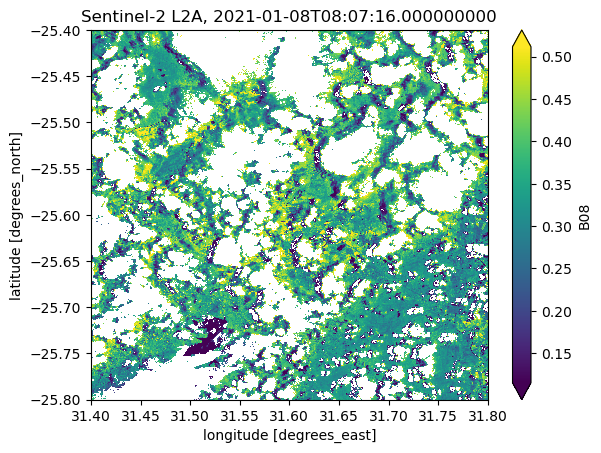

In [8]:
scene_B08 = ds_subset.B08.isel(time=10)

scene_B08.plot(robust=True)
plt.title(f"Sentinel-2 L2A, {scene_B08.time.data}")

```{tip}
The `robust=True` argument of the `.plot`-method clips the color scale to the 2nd and 98th percentiles. You might be familiar with this from other software to handle geospatial raster data like QGIS or ArcGIS.
```

Notice, that you can see some areas that are not perfectly masked (e.g., cloud 
shadows). Depending on your analysis, further cleaning steps of the data might 
be necessary.

Masked areas are [`numpy.nan`](https://numpy.org/doc/stable/reference/constants.html#numpy.nan)
values in the data array. By using Xarray's [`isnull`-method](https://docs.xarray.dev/en/stable/generated/xarray.Dataset.isnull.html#xarray.Dataset.isnull)
we can create (and visualise) a binary layer with nodata values encoded as 1 and valid pixels as 0:

Text(0.5, 1.0, 'Sentinel-2 L2A masked pixels, 2021-01-08T08:07:16.000000000')

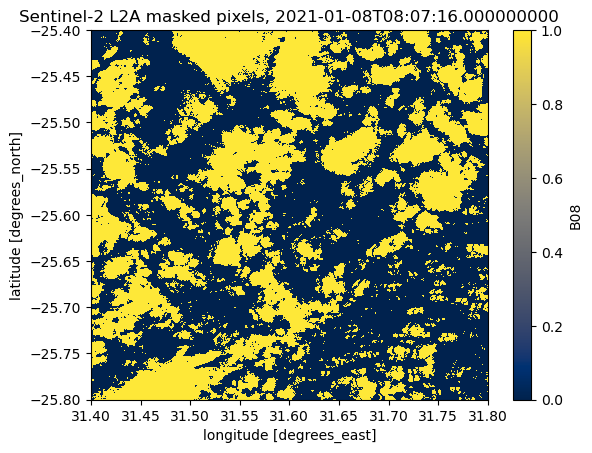

In [9]:
scene_B08.isnull().plot(cmap="cividis")
plt.title(f"Sentinel-2 L2A masked pixels, {scene_B08.time.data}")

Try loading the same data with the `s2_apply_mask`-parameter set to `False`.
How does the 2021-01-08 acquisition look like without cloud masking applied?

(group-acq-slices)=
## Group acquisition slices

One issue with the Sentinel-2 L2A product is that the data is split into 
multiple acquisition slices due to the overlapping grid used (which 
unfortunately is not the most efficient, see this recent publication by [Bauer-Marschallinger et al. (2023)](https://doi.org/10.1016/j.isprsjprs.2023.07.015).

You can view the entire grid over continental Africa in the Digital Earth Africa 
[Explorer](https://explorer.digitalearth.africa/products/s2_l2a).

The following example shows an acquisition that has been sliced into four parts with their timestamps only differing by a few seconds:

In [5]:
date = "2021-01-08"
ds.sel(time=date).time

<xarray.DataArray 'time' (time: 4)> Size: 32B
array(['2021-01-08T08:07:02.000000000', '2021-01-08T08:07:05.000000000',
       '2021-01-08T08:07:16.000000000', '2021-01-08T08:07:19.000000000'],
      dtype='datetime64[ns]')
Coordinates:
    spatial_ref  int32 4B 4326
  * time         (time) datetime64[ns] 32B 2021-01-08T08:07:02 ... 2021-01-08...

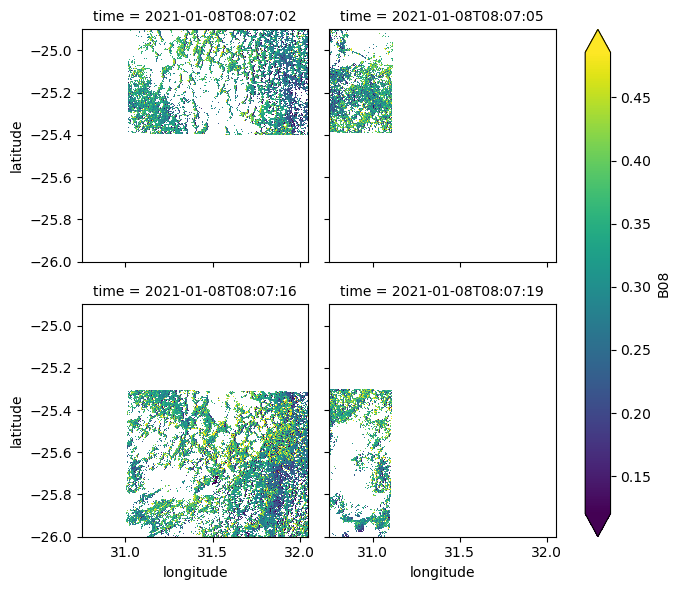

In [11]:
ds.sel(time=date).B08.plot(robust=True, col="time", col_wrap=2)

To mitigate this issue, we can group these slices by using the 
`sdc.utils.groupby_acq_slices`-function. It returns an `xarray.DataSet` object 
with the same dimensions as the input data, but with groups of acquisition 
slices aggregated by calculating the mean of each group. 

Notice that the number of time steps has decreased from 438 in the original data 
to 146.

In [6]:
ds_grouped = groupby_acq_slices(ds)
ds_grouped.B08

<xarray.DataArray 'B08' (time: 146, latitude: 5500, longitude: 6500)> Size: 21GB
dask.array<transpose, shape=(146, 5500, 6500), dtype=float32, chunksize=(146, 360, 425), chunktype=numpy.ndarray>
Coordinates:
  * latitude     (latitude) float64 44kB -24.9 -24.9 -24.9 ... -26.0 -26.0 -26.0
  * longitude    (longitude) float64 52kB 30.75 30.75 30.75 ... 32.05 32.05
    spatial_ref  int32 4B 4326
  * time         (time) datetime64[ns] 1kB 2021-01-01T08:00:00 ... 2021-12-29...
Attributes:
    nodata:   0

Executing the same code as we have at the beginning of this section, we can see that the acquisition slices have been grouped correctly:

In [7]:
ds_grouped.sel(time=date).time

<xarray.DataArray 'time' (time: 1)> Size: 8B
array(['2021-01-08T08:00:00.000000000'], dtype='datetime64[ns]')
Coordinates:
    spatial_ref  int32 4B 4326
  * time         (time) datetime64[ns] 8B 2021-01-08T08:00:00

Text(0.5, 1.0, "Sentinel-2 L2A, ['2021-01-08T08:00:00.000000000']")

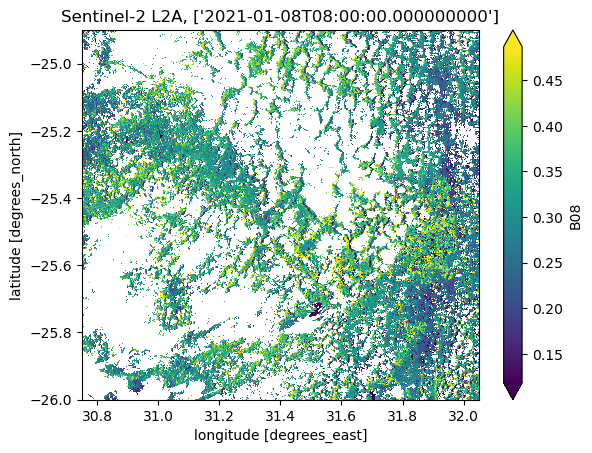

In [15]:
ds_grouped.B08.sel(time=date).plot(robust=True)
plt.title(f"Sentinel-2 L2A, {ds_grouped.B08.sel(time=date).time.data}")

## Spectral indices

Please refer to the following guide on how to {ref}`spectral_indices`